# Gathering Data

In [1]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
import os
import datetime as dt
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Import & write Image Predictions 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [4]:
# Read Image Predictions 
pred_img= pd.read_csv('image_predictions.tsv', sep = '\t', encoding = 'utf-8')

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [5]:
# List of dictionaries to read tweet's JSON data line by line.
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                       })
df_list[:3]

[{'tweet_id': 892420643555336193,
  'retweet_count': 7976,
  'favorite_count': 37218},
 {'tweet_id': 892177421306343426,
  'retweet_count': 5916,
  'favorite_count': 32011},
 {'tweet_id': 891815181378084864,
  'retweet_count': 3911,
  'favorite_count': 24103}]

In [6]:
# Create a DataFrame from JSON data
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 
                                             'retweet_count', 
                                             'favorite_count'])
status_df.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7976,37218
1,892177421306343426,5916,32011
2,891815181378084864,3911,24103


# Assessing Data

#### Visual assessment

In [7]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
pred_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
status_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7976,37218
1,892177421306343426,5916,32011
2,891815181378084864,3911,24103
3,891689557279858688,8120,40529
4,891327558926688256,8806,38760
5,891087950875897856,2930,19476
6,890971913173991426,1942,11368
7,890729181411237888,17753,62785
8,890609185150312448,4029,26790
9,890240255349198849,6938,30700


#### Programmatic assessmen

In [10]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
sum(df.tweet_id.duplicated())

0

In [14]:
sum(df.expanded_urls.duplicated())

137

In [15]:
df.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Bailey        7
Toby          7
an            7
Bella         6
Koda          6
Oscar         6
Leo           6
Jax           6
Stanley       6
Rusty         6
Scout         6
Jack          6
Milo          6
Dave          6
Gus           5
           ... 
Rizzo         1
Kane          1
Petrick       1
Sunshine      1
Chuck         1
Rodney        1
Kayla         1
Obie          1
Asher         1
Chuq          1
Dutch         1
Theo          1
Clifford      1
Ito           1
Beckham       1
Julio         1
Smiley        1
Zuzu          1
Chef          1
Fiji          1
Reptar        1
Olaf          1
Maya          1
Chase         1
Brandi        1
Skittles      1
Schnozz       1
Jarod         1
Jennifur      1
Maks          1
Name: name, Length: 957,

In [16]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
sum(pred_img.tweet_id.duplicated())

0

In [18]:
pred_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
pred_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
pred_img.jpg_url.duplicated().sum()

66

In [21]:
status_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7976,37218
1,892177421306343426,5916,32011
2,891815181378084864,3911,24103
3,891689557279858688,8120,40529
4,891327558926688256,8806,38760


In [22]:
sum(status_df.tweet_id.duplicated())

0

In [23]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [24]:
status_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2800.579940,7759.738534
std,6.820607e+16,4740.754177,12045.782898
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,562.000000,1348.000000
50%,7.184547e+17,1309.000000,3380.000000
75%,7.986654e+17,3261.000000,9518.000000
max,8.924206e+17,80486.000000,160812.000000


#### Quality
##### `twitter_archive` table
- tweet_id is an integer not a string.        
- Erroneous datatypes(timestamp).
- Unnecessary html tags in source column
- a,an,the and by as names
- Nulls represented as "None" (str) for name, doggo, floofer, pupper, 
   and puppo columns
- The numerator and denominator columns have unusual values.
- There are 2075 rows in the `image_predictions`, 2356 rows in `twitter_archive` dataframe and 2333 rows in the `status_df`.
- 137 duplicated rows in expanded_urls
-  Getting rid of retweets

##### `image_predictions` table
- 66 duplicated rows in jpg_url   


#### Tidiness

- doggo, floofer, pupper and puppo columns in `twitter_archive` table 
  should be merged into one column named "stage" and convert None to null
- Joining breed column with `twitter_archive` table
- retweet_count and favorite_count columns from `status_df`
  should be joined with twitter_archive table



# Cleaning Data

In [25]:
# Copies of the original pieces of data
df_clean = df.copy()
pred_clean =pred_img.copy()
status_clean = status_df.copy()

In [26]:
df_clean.info()
print('-'*5)
pred_clean.info()
print('-'*5)
status_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### dropping unnecessary columns from `twitter_archive` dataframe 

##### Define
use `DataFrame.drop` to drop  `in_reply_to_status_id`,`in_reply_to_user_id`,
`text`,`retweeted_status_id`,`retweeted_status_user_id` and
`retweeted_status_timestamp` columns

##### Code

In [27]:
# dropping unnecessary columns from twitter_archive dataframe

df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
               'retweeted_status_id','retweeted_status_user_id',
               'retweeted_status_timestamp'],axis=1, 
             inplace = True)

##### Test

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


###  Tidiness

##### 1- doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column named "stage"

##### Define 
create a dataFrame for doggo, floofer, pupper and puppo columns in `twitter_archive`.Then create a column named stage and merge it with
`twitter_archive`.Drop them.


##### Code

In [29]:
df_stage = df_clean[['tweet_id','doggo','floofer', 'pupper','puppo']]
df_stage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id    2356 non-null int64
doggo       2356 non-null object
floofer     2356 non-null object
pupper      2356 non-null object
puppo       2356 non-null object
dtypes: int64(1), object(4)
memory usage: 92.1+ KB


In [30]:
# add 4 dog stages to one column

stage_list = []
# Iterate over each row 

for index, rows in df_stage.iterrows(): 
    # Create list for the current row 
    mlist =[rows.doggo, rows.floofer, rows.pupper, rows.puppo] 
    # convert every list to string
    res = str("".join(mlist)) 
    # append the list to the final list 
    stage_list.append(res) 

df_stage['stage']= pd.Series(stage_list)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
df_stage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id    2356 non-null int64
doggo       2356 non-null object
floofer     2356 non-null object
pupper      2356 non-null object
puppo       2356 non-null object
stage       2356 non-null object
dtypes: int64(1), object(5)
memory usage: 110.5+ KB


In [32]:
# drop columns from doggo to puppo
df_stage= df_stage.drop(df_stage.loc[:,'doggo':'puppo'],axis = 1)

In [33]:
# replace 4 stages with 1 stage

w_list=['NoneNoneNoneNone','doggoNoneNoneNone','NoneflooferNoneNone',
        'NoneNonepupperNone','NoneNoneNonepuppo']
o_list=['None', "doggo","floofer","pupper","puppo"]
for i in (df_stage.stage):
    if i in w_list :
        df_stage['stage'].replace(i,o_list[w_list.index(i)], inplace=True) 
        


In [34]:
# Handle multiple stages          
df_stage.loc[df_stage.stage == 'doggoNonepupperNone', 'stage'] = 'doggo,pupper'
df_stage.loc[df_stage.stage == 'doggoNoneNonepuppo', 'stage'] = 'doggo,puppo'
df_stage.loc[df_stage.stage == 'doggoflooferNoneNone', 'stage'] = 'doggo,floofer'
# Handle missing values
df_stage.loc[df_stage.stage == '', 'stage'] = np.nan

In [35]:
#Convert None to null
df_stage= df_stage.replace('None',np.NaN)
df_clean= df_clean.replace('None',np.NaN)

In [36]:
#Merge df_stage with df_clean 
#then drop columns from doggo to puppo
df_clean = pd.merge(df_clean, df_stage, on=['tweet_id'],how = 'left')

df_clean = df_clean.drop(df_clean.loc[:,'doggo':'puppo'],axis = 1)

##### Test

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
stage                 380 non-null object
dtypes: int64(3), object(6)
memory usage: 184.1+ KB


In [38]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [39]:
df_clean['stage'].value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

#### 2- Condensing dog breed predictions

##### Define
create a function to extract the breed of dogs

##### Code

In [40]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

pred_clean.apply(breed_conf, axis = 1)

pred_clean['breed'] = breed
pred_clean['confidence'] = conf

In [41]:
#removing the processed columns
pred_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',
         'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

##### Test

In [42]:
pred_clean.head()

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [43]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


In [44]:
pred_clean.breed.value_counts()

Unidentifiable                 324
golden_retriever               173
Labrador_retriever             113
Pembroke                        96
Chihuahua                       95
pug                             65
toy_poodle                      52
chow                            51
Samoyed                         46
Pomeranian                      42
cocker_spaniel                  34
malamute                        34
French_bulldog                  32
Chesapeake_Bay_retriever        31
miniature_pinscher              26
Cardigan                        23
Staffordshire_bullterrier       22
Eskimo_dog                      22
beagle                          21
German_shepherd                 21
Shih-Tzu                        20
Siberian_husky                  20
kuvasz                          19
Rottweiler                      19
Shetland_sheepdog               19
Lakeland_terrier                19
Maltese_dog                     19
basset                          17
Italian_greyhound   

#### 3- Joining breed column with twitter_archive table
##### Define 
merge breed column  with twitter_archive table by tweet_id

##### Code

In [45]:
df_clean = pd.merge(df_clean, pred_clean, on=['tweet_id'],how = 'left')
df_clean = df_clean.drop(['jpg_url', 'img_num'], axis=1)

In [46]:
#Convert Unidentifiable to Null
df_clean['breed'].replace('Unidentifiable',np.NaN, inplace =True)

##### Test

In [47]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed,confidence
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,basset,0.555712


In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
stage                 380 non-null object
breed                 1751 non-null object
confidence            2075 non-null float64
dtypes: float64(1), int64(3), object(7)
memory usage: 220.9+ KB


In [49]:
df_clean.breed.value_counts()

golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
malamute                           34
cocker_spaniel                     34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Staffordshire_bullterrier          22
Eskimo_dog                         22
beagle                             21
German_shepherd                    21
Siberian_husky                     20
Shih-Tzu                           20
kuvasz                             19
Rottweiler                         19
Maltese_dog                        19
Shetland_sheepdog                  19
Lakeland_terrier                   19
Italian_grey

#### 4- Joining retweet_count and favorite_count columns from status_df  with twitter_archive table

##### Define 

merge retweet_count and favorite_count with twitter_archive table by tweet_id

##### Code

In [50]:
df_clean = pd.merge(df_clean, status_df, on=['tweet_id'],how = 'left')

##### Test

In [51]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,0.000000,7976.0,37218.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,Chihuahua,0.323581,5916.0,32011.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,Chihuahua,0.716012,3911.0,24103.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,Labrador_retriever,0.168086,8120.0,40529.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,basset,0.555712,8806.0,38760.0


In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
stage                 380 non-null object
breed                 1751 non-null object
confidence            2075 non-null float64
retweet_count         2333 non-null float64
favorite_count        2333 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 257.7+ KB


### Quality

#### 5- tweet_id is an integer not a string and timestamp is object not date

##### Define 
 use astype to convert integers to strings and object to date
 
##### Code


In [53]:
# tweet_id is an integer not a string.
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
pred_clean['tweet_id'] = pred_clean['tweet_id'].astype(str)
status_clean['tweet_id'] = pred_clean['tweet_id'].astype(str)

# timestamp to date
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

##### Test

In [54]:
df_clean.info()
print('-'*5)
pred_clean.info()
print('-'*5)
status_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
stage                 380 non-null object
breed                 1751 non-null object
confidence            2075 non-null float64
retweet_count         2333 non-null float64
favorite_count        2333 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 257.7+ KB
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
img_num       2075 non-null int64
breed         2075 non-null

In [55]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,0.000000,7976.0,37218.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,Chihuahua,0.323581,5916.0,32011.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,Chihuahua,0.716012,3911.0,24103.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,Labrador_retriever,0.168086,8120.0,40529.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,basset,0.555712,8806.0,38760.0


#### 8- 66 duplicated jpg_url  and 137 duplicated rows in expanded_urls
##### Define
use .drop_duplicates to drop the duplicated rows

##### Code

In [56]:
df_clean['expanded_urls'].drop_duplicates(inplace = True)

In [57]:
pred_clean['jpg_url'].drop_duplicates(inplace = True)

##### Test

In [58]:
sum(pred_clean.jpg_url.duplicated())

0

In [59]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
img_num       2075 non-null int64
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 80.6+ KB


In [60]:
sum(df_clean.expanded_urls.duplicated())

0

In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
stage                 380 non-null object
breed                 1751 non-null object
confidence            2075 non-null float64
retweet_count         2333 non-null float64
favorite_count        2333 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 256.6+ KB


#### 9- Unnecessary html tags in source column 
##### Define
strip all html anchor tags (i.e. <a..></a>) in source column and retain just the text in between the tags. Convert the datatype from string to categorical.
##### Code

In [62]:
df_clean.source = df_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
df_clean.source = df_clean.source.astype('category')

##### Test

In [63]:
df_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [64]:
df_clean.source.sample(5)

70      Twitter for iPhone
1239    Twitter for iPhone
622     Twitter for iPhone
2081    Twitter for iPhone
315     Twitter for iPhone
Name: source, dtype: category
Categories (4, object): [TweetDeck, Twitter Web Client, Twitter for iPhone, Vine - Make a Scene]

#### 9- a,an,the and by as names
##### Define 
replace a,an,the and by  with np.nan
##### Code

In [65]:
df_clean['name'].replace(np.nan,'None',inplace=True)
# Find all names that start with a lowercase letter
lowercase_names = []
for word in df_clean['name']:
    if word[0].islower() and word not in lowercase_names:
        lowercase_names.append(word)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [66]:
# Replace all names that start with a lowercase letter with a NaN
df_clean['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
df_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

##### Test

In [67]:
df_clean['name'].value_counts()

Charlie     12
Lucy        11
Oliver      11
Cooper      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
Buddy        7
Toby         7
Daisy        7
Bailey       7
Scout        6
Stanley      6
Leo          6
Milo         6
Rusty        6
Jack         6
Jax          6
Dave         6
Bella        6
Koda         6
Oscar        6
Louis        5
Finn         5
Sunny        5
Sammy        5
Larry        5
            ..
Jersey       1
Rizzo        1
Kane         1
Petrick      1
Sunshine     1
Chuck        1
Hazel        1
Rodney       1
Kayla        1
Obie         1
Theo         1
Clifford     1
Ito          1
Beckham      1
Julio        1
Smiley       1
Zuzu         1
Asher        1
Chef         1
Reptar       1
Olaf         1
Maya         1
Chase        1
Brandi       1
Skittles     1
Schnozz      1
Jarod        1
Jennifur     1
Fiji         1
Maks         1
Name: name, Length: 931, dtype: int64

In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null category
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1502 non-null object
stage                 380 non-null object
breed                 1751 non-null object
confidence            2075 non-null float64
retweet_count         2333 non-null float64
favorite_count        2333 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 241.8+ KB


### 10- The numerator and denominator columns have unusual values.

#### Define 
create a function that identifies the value before the last / in the text and uses this in the rating_numerator column. Manually correct any ratings that are not covered by the function.

#### Code

In [69]:
def find_numerator(x):
    # Ratings are associated with the last "/"
    slash = x.find("/")
    # Don't need to check for missing because original set only includes tweets with ratings
    # Most ratings are two digits, but if not, preceded by " ", "()" or "..."
    # Check for decimal
    try:
        if x[slash - 2] == ".":
            numerator = x[slash - 4:slash].strip()
            if numerator[0] == ".":
                numerator = numerator.strip("...").strip("..")
        else:
            numerator = x[slash - 2:slash].strip().strip("(")
        
    
        
        return float(numerator)
    # Manage strange formatting
    except ValueError:
        return np.NaN

In [70]:
def find_denominator(x):
    # Ratings are associated with the last "/"
    slash = x.find("/")
    # Don't need to check for missing because original set only includes tweets with ratings
    # Expect denominator to be two digits
    try:
        denominator = x[slash + 1:slash + 3]
        return float(denominator)
    
    # Manage strange formatting
    except ValueError:
        return np.NaN

In [71]:
df_clean.rating_numerator = df_clean.text.apply(find_numerator)

In [72]:
# Identify strange formatting
missing_numerator = list(df_clean[df_clean.rating_numerator.isnull()].index)
missing_numerator

[885, 1249, 1815, 2246]

In [73]:
# Check full text for each
for index in missing_numerator:
    print(index, df_clean.text[index])

885 RT @hownottodraw: The story/person behind @dog_rates is heckin adorable af. 11/10, probably would pet. https://t.co/AG5UnRrmzJ
1249 What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz
1815 This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF
2246 This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN


In [74]:
df_clean.at[missing_numerator[0], 'rating_numerator'] = 3.0
df_clean.at[missing_numerator[1], 'rating_numerator'] = 12.0
df_clean.at[missing_numerator[2], 'rating_numerator'] = 2.0

In [75]:
# Finding denominator
df_clean.rating_denominator = df_clean.text.apply(find_denominator)

In [76]:
missing_denominator = list(df_clean[df_clean.rating_denominator.isnull()].index)
missing_denominator

[885, 1249, 1815]

In [77]:
# Check full text for each
for index in missing_denominator:
    print(index, df_clean.text[index])

885 RT @hownottodraw: The story/person behind @dog_rates is heckin adorable af. 11/10, probably would pet. https://t.co/AG5UnRrmzJ
1249 What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz
1815 This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF


In [78]:
df_clean.at[missing_numerator[0], 'rating_denominator'] = 10.0
df_clean.at[missing_numerator[1], 'rating_denominator'] = 10.0


#### Test

In [79]:
df_clean.rating_numerator.value_counts()

 12.0    558
 11.0    463
 10.0    461
 13.0    351
 9.0     158
 8.0     102
 7.0      55
 14.0     54
 5.0      34
 6.0      32
 3.0      19
 4.0      18
 1.0       9
 2.0       9
 20.0      3
 0.0       2
 60.0      2
 15.0      2
 75.0      2
 44.0      2
 43.0      1
-5.0       1
 45.0      1
 82.0      1
 13.5      1
 17.0      1
 99.0      1
 66.0      1
 65.0      1
 88.0      1
 76.0      1
 26.0      1
 9.5       1
 21.0      1
 84.0      1
 24.0      1
 80.0      1
 50.0      1
 27.0      1
Name: rating_numerator, dtype: int64

In [80]:
df_clean.rating_denominator.value_counts()

10.0    2332
11.0       4
50.0       3
80.0       2
20.0       2
15.0       2
90.0       1
70.0       1
2.0        1
12.0       1
16.0       1
13.0       1
40.0       1
17.0       1
7.0        1
0.0        1
Name: rating_denominator, dtype: int64

### Creating a new column called rating
#### Define
Inserting a new column called rating in `df_clean`.Its value = rating_numerator / rating_denominator. Drop both of them
#### Code

In [81]:
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

In [82]:
df_clean = df_clean.drop(df_clean.loc[:,'rating_numerator':'rating_denominator'],axis = 1)

#### Test

In [83]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,stage,breed,confidence,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,NaN,0.000000,7976.0,37218.0,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,Chihuahua,0.323581,5916.0,32011.0,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,Chihuahua,0.716012,3911.0,24103.0,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,Labrador_retriever,0.168086,8120.0,40529.0,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,basset,0.555712,8806.0,38760.0,1.2


In [84]:
df_clean.rating.value_counts()

 1.200000    560
 1.100000    465
 1.000000    463
 1.300000    351
 0.900000    157
 0.800000    102
 1.400000     54
 0.700000     54
 0.500000     35
 0.600000     32
 0.300000     19
 0.400000     15
 0.200000     10
 0.100000      8
 2.000000      2
 0.818182      2
 1.500000      2
 0.000000      2
 7.500000      2
 4.333333      1
 8.200000      1
 inf           1
 1.909091      1
 1.250000      1
-0.500000      1
 0.235294      1
 6.600000      1
 3.428571      1
 2.700000      1
 7.600000      1
 0.636364      1
 0.950000      1
 3.307692      1
 0.733333      1
 3.666667      1
 1.350000      1
 1.700000      1
 2.600000      1
Name: rating, dtype: int64

### 11-Getting rid of retweets
#### Define

There are some retweets that we can point out as they start with 'RT' in the text column. We don't want them, so we'll take them out.

### Code


In [85]:
df_clean = df_clean.loc[df_clean['text'].str.startswith('RT') == False]

#### Test

In [86]:
df_clean.loc[df_clean['text'].str.startswith('RT') != False]

,tweet_id,timestamp,source,text,expanded_urls,name,stage,breed,confidence,retweet_count,favorite_count,rating


In [87]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id          2173 non-null object
timestamp         2173 non-null datetime64[ns]
source            2173 non-null category
text              2173 non-null object
expanded_urls     2115 non-null object
name              1391 non-null object
stage             344 non-null object
breed             1685 non-null object
confidence        1993 non-null float64
retweet_count     2166 non-null float64
favorite_count    2166 non-null float64
rating            2171 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), object(6)
memory usage: 206.0+ KB


### Storing Data

In [88]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing Data
At least three (3) insights and one (1) visualization must be produced.

In [89]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,stage,breed,confidence,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,NaN,0.000000,7976.0,37218.0,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,Chihuahua,0.323581,5916.0,32011.0,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,Chihuahua,0.716012,3911.0,24103.0,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,Labrador_retriever,0.168086,8120.0,40529.0,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,basset,0.555712,8806.0,38760.0,1.2


In [90]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id          2173 non-null object
timestamp         2173 non-null datetime64[ns]
source            2173 non-null category
text              2173 non-null object
expanded_urls     2115 non-null object
name              1391 non-null object
stage             344 non-null object
breed             1685 non-null object
confidence        1993 non-null float64
retweet_count     2166 non-null float64
favorite_count    2166 non-null float64
rating            2171 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), object(6)
memory usage: 206.0+ KB


In [91]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,stage,breed,confidence,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,NaN,0.000000,7976.0,37218.0,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,Chihuahua,0.323581,5916.0,32011.0,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,Chihuahua,0.716012,3911.0,24103.0,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,Labrador_retriever,0.168086,8120.0,40529.0,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,basset,0.555712,8806.0,38760.0,1.2


##### Most used Twitter source

In [92]:
df_clean['source'].value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

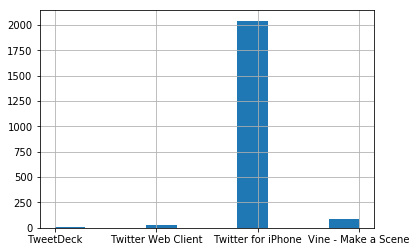

In [93]:
df_clean['source'].hist()

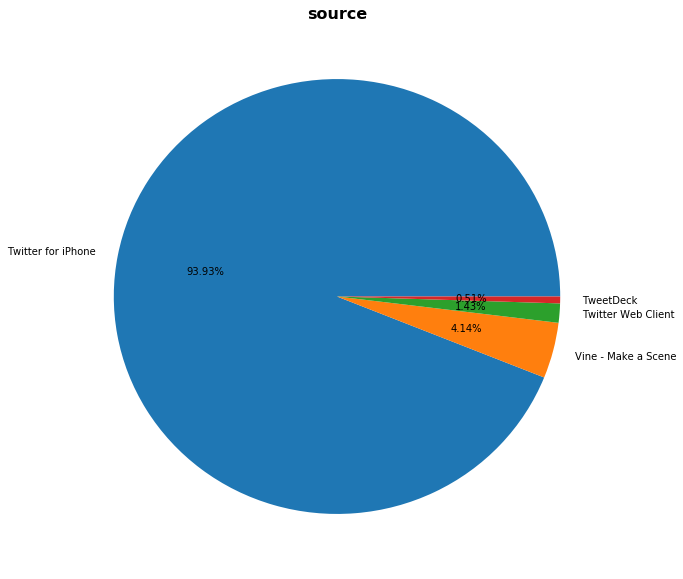

In [94]:
# Shows the repartition of the source with a pie chart.
explode = np.linspace(0,0.4,4)
df_clean['source'].value_counts().sort_values(ascending=False).plot.pie(legend=False, 
                                                                        subplots=True, 
                                                                        autopct='%.2f%%',
                                                                        figsize=(10,10))
plt.ylabel('')
plt.title('source', weight='bold', fontsize=16)
plt.savefig('source.png')

Twitter for iPhone is the highest source of tweets

#### Most Common Stage

In [95]:
df_clean['stage'].value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

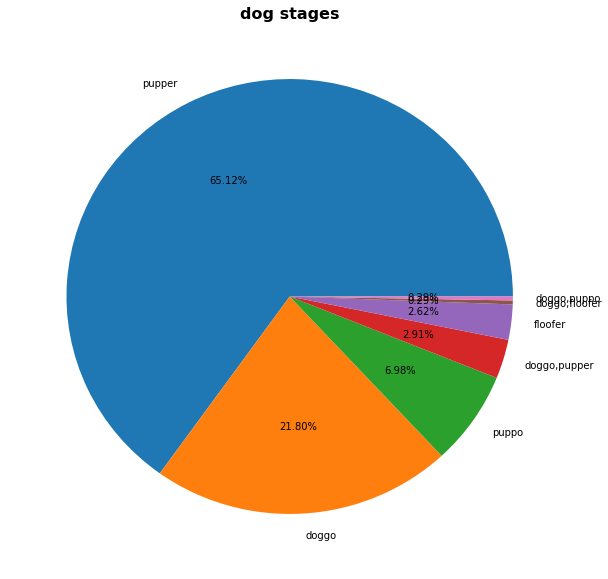

In [96]:
# Shows the repartition of the dog stages with a pie chart.
explode = np.linspace(0,0.4,4)
df_clean['stage'].value_counts().sort_values(ascending=False).plot.pie(legend=False, 
                                                                        subplots=True, 
                                                                        autopct='%.2f%%',
                                                                        figsize=(10,10))
plt.ylabel('')
plt.title('dog stages', weight='bold', fontsize=16)
plt.savefig('DogStages.png')

Pupper is most common stage

#### Favorites and Retweets through Time

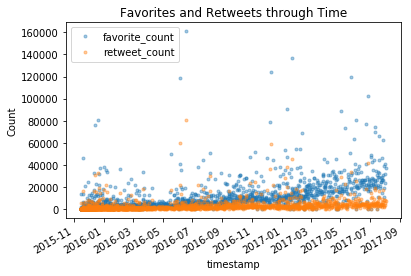

In [97]:
df_clean.set_index('timestamp', inplace=True)
df_clean[['favorite_count', 'retweet_count']].plot(style = '.', 
                                                    alpha = 0.4)
plt.title('Favorites and Retweets through Time')
plt.xlabel('timestamp')
plt.ylabel('Count');
plt.savefig('FavoritesRetweets.png')

In [98]:
df_clean.retweet_count.sum() < df_clean.favorite_count.sum()

True

Number of favorite_count is bigger than retweet_count

#### What is  the most popular name (favorites, retweets)?

In [99]:
df_clean.reset_index(inplace=True)
popular_name = df_clean.groupby(['name'],as_index =False)[['retweet_count','favorite_count']].sum()
popular_name.sort_values(by=['retweet_count','favorite_count'],ascending=False).head(3)

,name,retweet_count,favorite_count
99,Bo,67298.0,175340.0
813,Stephan,58676.0,124266.0
262,Duddles,41889.0,101984.0


Bo is the most popular name

 ##### What is the most popular breed (favorites, retweets)?

In [100]:
pop_bre = df_clean.groupby(['breed'],as_index =False)['retweet_count','favorite_count'].sum()
pop_bre.sort_values(by=['retweet_count','favorite_count'],ascending=False).head(3)

,breed,retweet_count,favorite_count
89,golden_retriever,538945.0,1856222.0
37,Labrador_retriever,360592.0,1161577.0
49,Pembroke,267162.0,995817.0


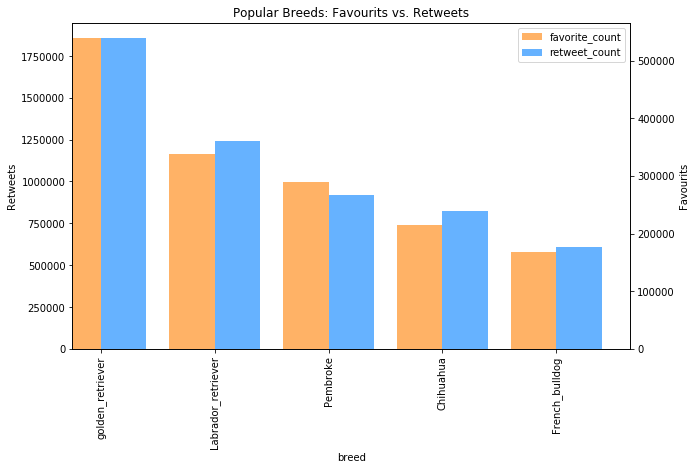

In [101]:
bre_ret = df_clean.groupby(['breed'])['retweet_count'].sum().sort_values(ascending=False).head(5)

bre_fav = df_clean.groupby(['breed'])['favorite_count'].sum().sort_values(ascending=False).head(5)

fig = plt.figure() # Creates matplotlib figure

ax = fig.add_subplot(111) # Creates matplotlib axes
ax2 = ax.twinx() # Creates another axes that shares the same x-axis as ax.

width = 0.4

bre_fav.plot(figsize = (6,6), kind='bar', color='#FFB266', 
             ax=ax, width=width, position=1, 
             title='Popular Breeds: Favourits vs. Retweets')

bre_ret.plot(figsize = (10,6), kind='bar', color='#66B2FF', 
             ax=ax2, width=width, position=0)

# Turns off grid on the left Axis.
ax.grid(False)

# Turns off grid on the secondary (right) Axis.
ax2.grid(False)

ax2.set_ylabel('Favourits')
ax.set_ylabel('Retweets')

ax.set_xticklabels(bre_fav.index, rotation=90)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=1)
plt.show()
plt.savefig('pop_breeds.png')

golden_retriever is the most popular breed

#### Corr. between tweets and favourites

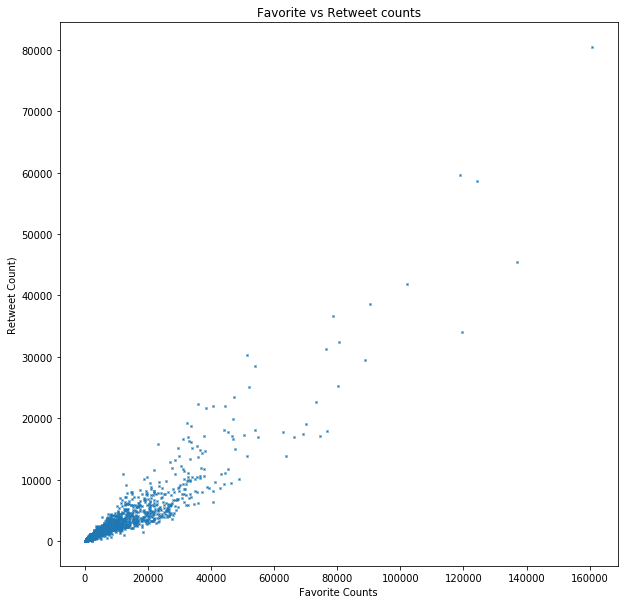

In [102]:
plt.figure(figsize = (10, 10))
plt.plot(df_clean.favorite_count, df_clean.retweet_count, marker='x', linestyle='', ms=2 )
plt.title('Favorite vs Retweet counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Count)')
plt.show()
plt.savefig('corr.png')

Above seems like a strog relationship but abviously if tweet get liked then thats the one get retweeted thousands of time.
